In [2]:
from parse import parse
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [3]:
positions = []
velocities = []
fmt_string = "position=<{:d}, {:d}> velocity=<{:d}, {:d}>"
with open("input.txt", "r") as fp:
    for l in fp.readlines():
        px, py, vx, vy = parse(fmt_string, l)
        positions.append([px, py])
        velocities.append([vx, vy])
positions = np.array(positions)
velocities = np.array(velocities)

In [4]:
def min_func(t):
    global positions
    global velocities
    new_pos = positions + t * velocities
    y_std = np.std(new_pos[:, 1])
    return y_std

In [5]:
pars = (0)
min_results = optimize.minimize(min_func, pars)
time = np.round(min_results['x'])
time

array([10519.])

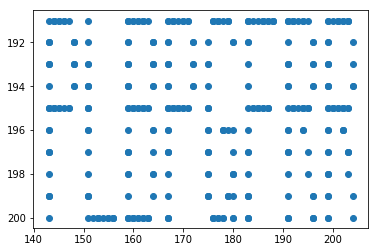

In [7]:
best_pos = positions + time * velocities
plt.scatter(best_pos[:, 0], best_pos[:, 1])
plt.gca().invert_yaxis()
plt.show()